In [3]:
using LinearAlgebra
using Plots
using DataFrames
using CSV

In [18]:
used_ts = 1:25
cart40_ts = 1:25

cart10_ts = 1:7
thin_used_ts = 1:7

colors = theme_palette(:auto)
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole-scale")
;

In [19]:
function loadDataFrame(mode, opts)
    if mode == :cart10; mstr = "cart10"
    elseif mode == :cart40; mstr = "cart40"
    else error("Unsupported mode: $(mode)")
    end
    
    if opts == :deepsdp; ostr = "deepsdp"
    elseif opts == :deepsdp_dual; ostr = "deepsdp__dual"
    elseif opts == :chordal; ostr = "chordal__single_decomp"
    elseif opts == :chordal2; ostr = "chordal__double_decomp"
    elseif opts == :chordal2_dual; ostr = "chordal__dual__double_decomp"
    else error("Unsupported method: $(method)") 
    end
    
    filepath = joinpath(DUMP_DIR, "$(mstr)_$(ostr).csv")
    return CSV.File(filepath)
end

cart10_deepsdp_df = loadDataFrame(:cart10, :deepsdp)
cart10_deepsdp_dual_df = loadDataFrame(:cart10, :deepsdp_dual)
cart10_chordal_df = loadDataFrame(:cart10, :chordal)
cart10_chordal2_df = loadDataFrame(:cart10, :chordal2)

cart40_deepsdp_dual_df = loadDataFrame(:cart40, :deepsdp_dual)
cart40_chordal2_df = loadDataFrame(:cart40, :chordal2)
cart40_chordal2_dual_df = loadDataFrame(:cart40, :chordal2_dual)
;

In [20]:
# [cart10_deepsdp_df[:obj_val] cart10_chordal2_df[:obj_val]]

In [21]:
# dfs are ordered by t
function plotDataFrames(batch; kwargs...)
    marker_size = 6
    plt = plot()
    for (df, label, color) in batch
        ts = df[:t]
        num_ts = length(ts)
        plot!(plt, 1:num_ts, df.total_secs,
            color = color,
            marker = (:circle, marker_size),
            label = label)
    end
    plt = plot!(plt; kwargs...)
    return plt
end

plotDataFrames (generic function with 1 method)

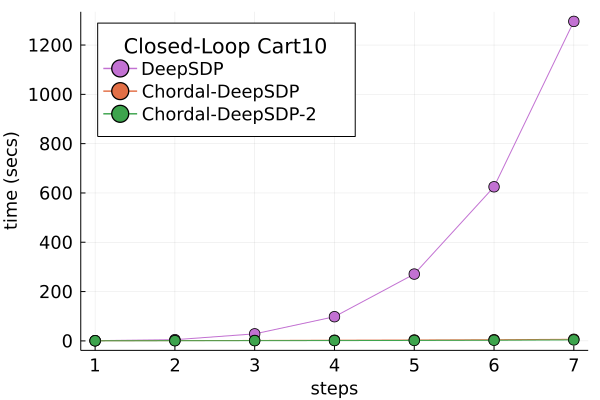

In [22]:
batch = [(cart10_deepsdp_df, "DeepSDP", colors[4]),
         (cart10_chordal_df, "Chordal-DeepSDP", colors[2]),
         (cart10_chordal2_df, "Chordal-DeepSDP-2", colors[3])]

fs = 12
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
    xlabelfontsize = fs, xtickfontsize = fs,
    ylabelfontsize = fs, ytickfontsize = fs,
    legendfontsize = fs, legendtitlefontsize = fs+2,
)

savefig(plt, joinpath(DUMP_DIR, "scale-deep-vs-chordal-vs-chordal2.png"))

plt

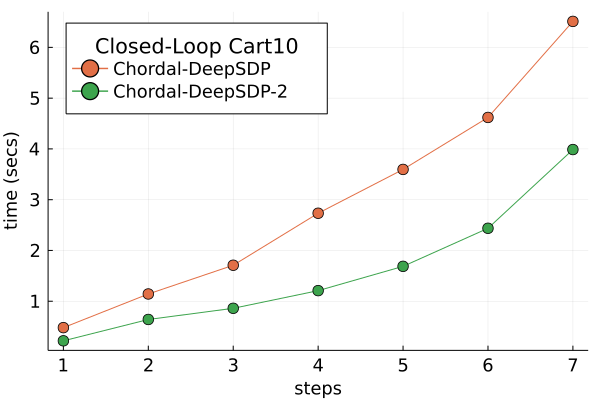

In [23]:
batch = [
         # (cart10_deepsdp_df, "DeepSDP", colors[4]),
         (cart10_chordal_df, "Chordal-DeepSDP", colors[2]),
         (cart10_chordal2_df, "Chordal-DeepSDP-2", colors[3])]

fs = 12
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
    xlabelfontsize = fs, xtickfontsize = fs,
    ylabelfontsize = fs, ytickfontsize = fs,
    legendfontsize = fs, legendtitlefontsize = fs+2,
)

savefig(plt, joinpath(DUMP_DIR, "scale-chordal-vs-chordal2.png"))

plt

In [24]:
CSV.

LoadError: syntax: incomplete: premature end of input

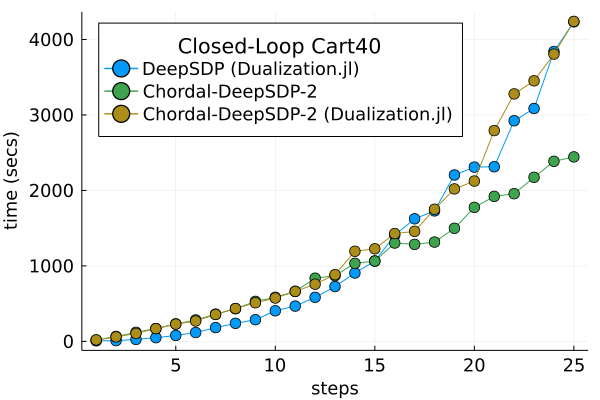

In [25]:
batch = [
         (cart40_deepsdp_dual_df, "DeepSDP (Dualization.jl)", colors[1]),
         (cart40_chordal2_df, "Chordal-DeepSDP-2", colors[3]),
         (cart40_chordal2_dual_df, "Chordal-DeepSDP-2 (Dualization.jl)", colors[5])
]

fs = 12
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart40",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
    xlabelfontsize = fs, xtickfontsize = fs,
    ylabelfontsize = fs, ytickfontsize = fs,
    legendfontsize = fs, legendtitlefontsize = fs+2,
)

savefig(plt, joinpath(DUMP_DIR, "scale-deepdual-vs-chordal2.png"))

plt

In [26]:
[cart40_chordal2_df[:total_secs] cart40_deepsdp_dual_df[:total_secs]]

25×2 Matrix{Float64}:
   16.1114     7.52952
   65.3061     9.95859
  119.792     26.2009
  169.99      48.9978
  231.465     78.6392
  283.789    117.445
  360.898    182.562
  432.552    239.271
  529.982    287.378
  583.614    405.452
  662.715    467.813
  837.554    584.051
  870.334    726.269
 1034.17     905.826
 1064.24    1064.15
 1303.15    1405.62
 1285.37    1624.14
 1315.96    1729.07
 1498.33    2204.49
 1775.47    2309.18
 1921.0     2313.88
 1956.9     2923.33
 2173.98    3085.44
 2385.91    3841.15
 2444.21    4233.62